# 위스콘신 유방암 데이터 분류

유방에서 만져지는 덩어리에 대한 세침 흡인 검사(FNA, 유방생검)를 통해 수집된 표본의 세포핵의 특성을 설명하는 데이터를 통해 암이 양성인지 악성인지 예측하기 위한 데이터 셋

> https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

> https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## #01. 준비작업

### [1] 패키지 가져오기

In [2]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from help_a.util import *
from help_a.plot import *
from help_a.analysis import *
from help_a.classification import *

### [2] 데이터 가져오기

| 변수 | 설명 |
|---|---|
| id | 일련번호
| diagnosis | 유방조직의 진단 (`M`=악성, `B`=양성) |
| 그 밖의 변수 | 종양 세포에 관한 의학적 지표들 |

In [3]:
origin = my_read_excel("https://data.hossam.kr/mldata/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  are

## #02. 탐색적 데이터 분석

### [1] 상자그림

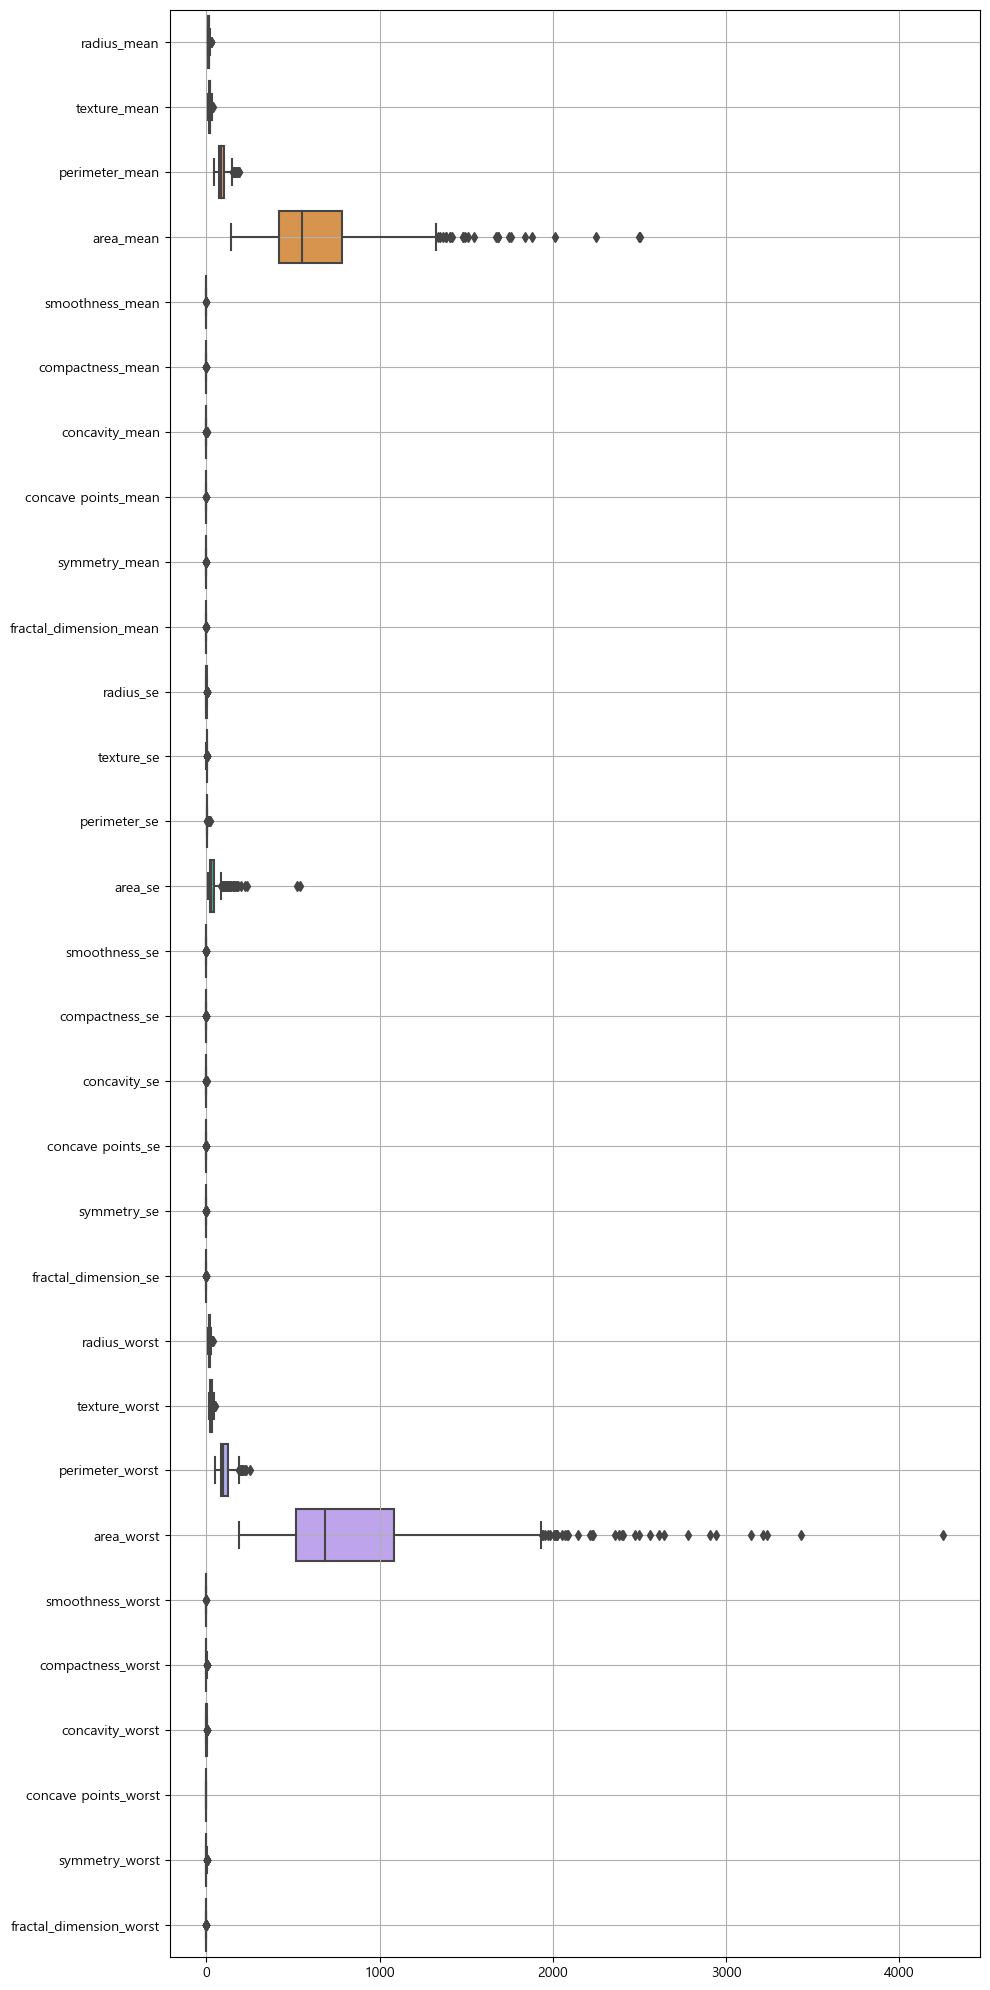

In [4]:
my_boxplot(origin, orient='h', figsize=(10, 20))

> 데이터 스케일링이 필요할 것으로 판단됨

### [2] 종속변수에 따른 데이터 분포 비교

In [5]:
yname = 'diagnosis'
xnames = list(origin.drop(yname, axis=1).columns)

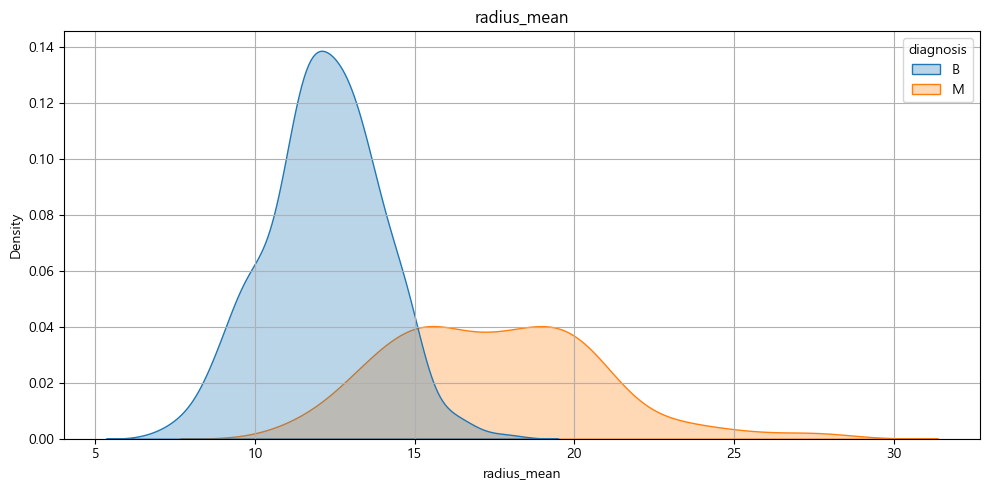

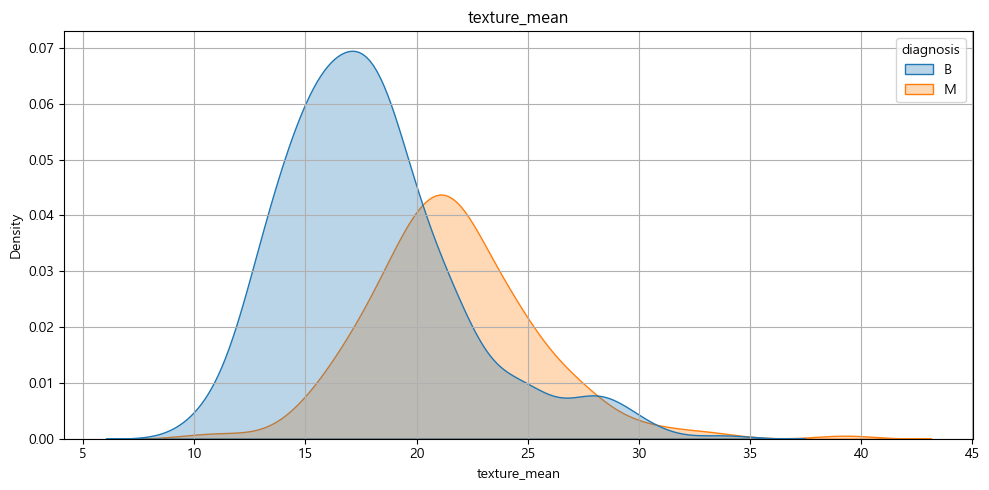

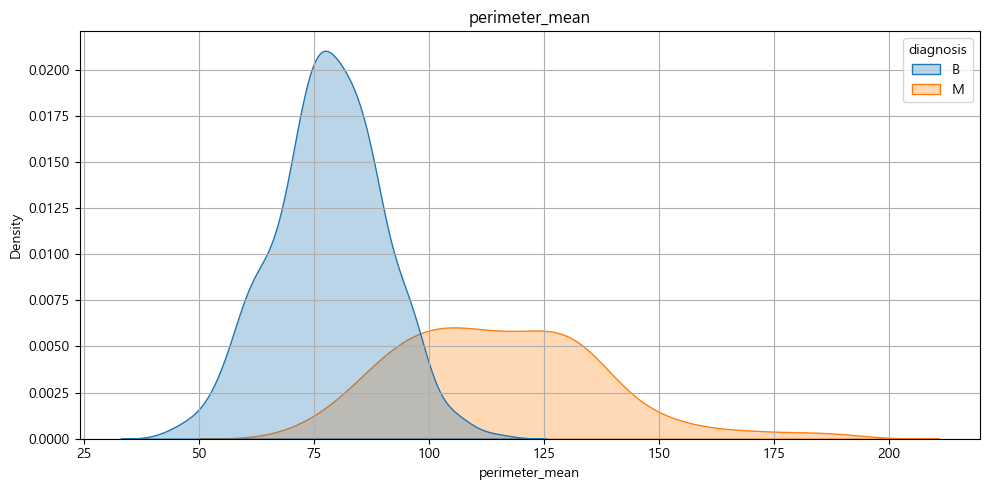

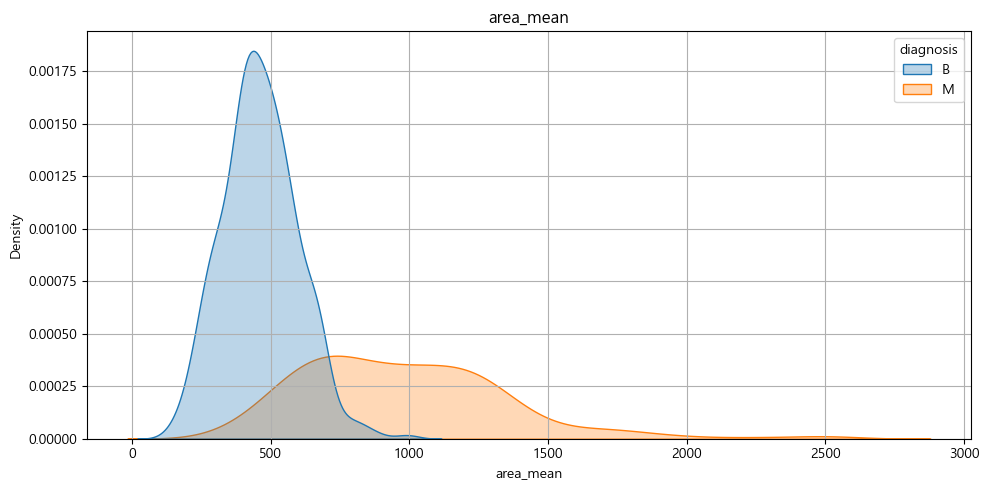

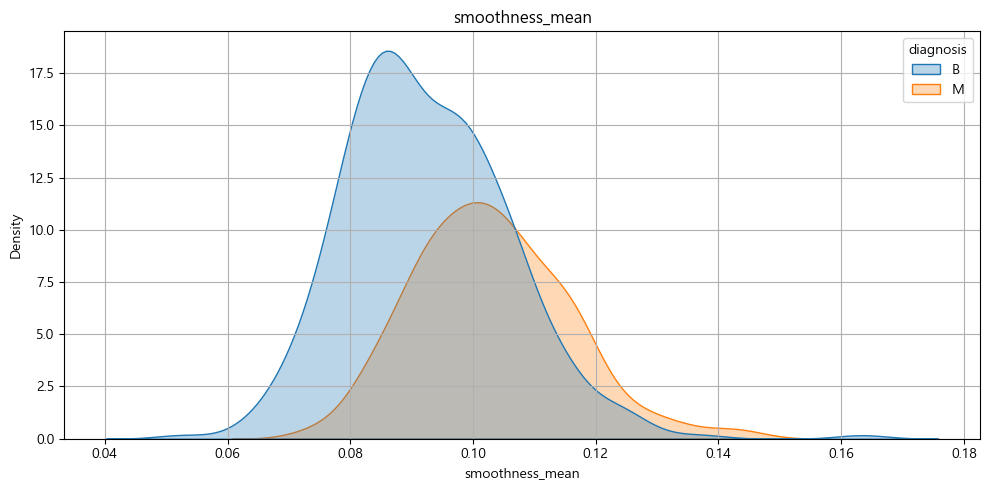

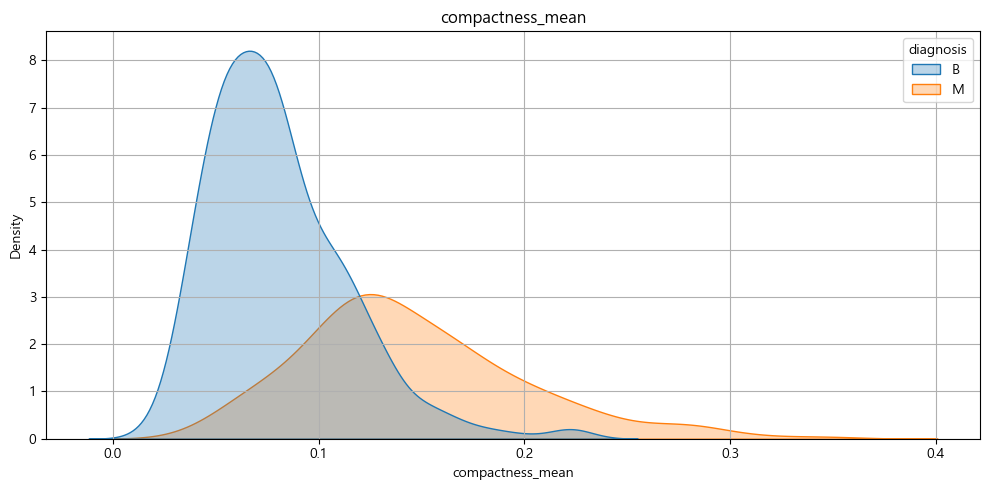

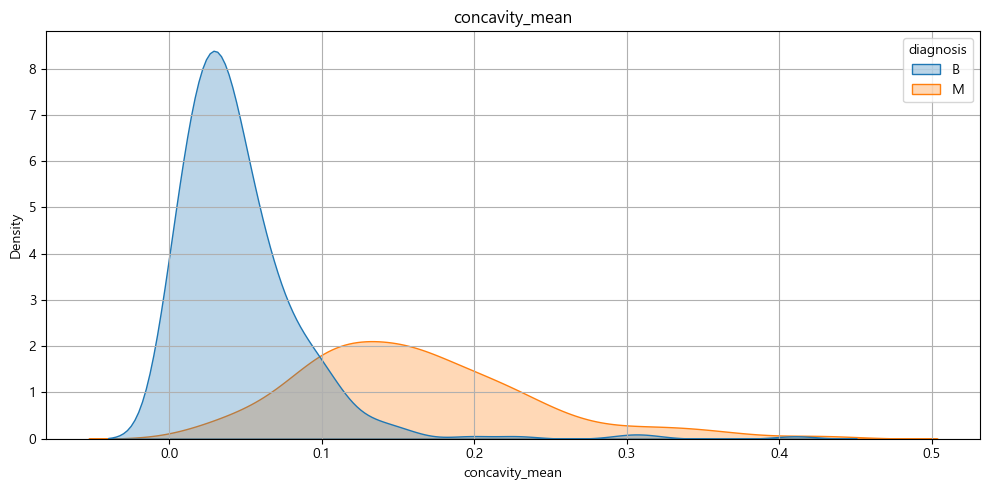

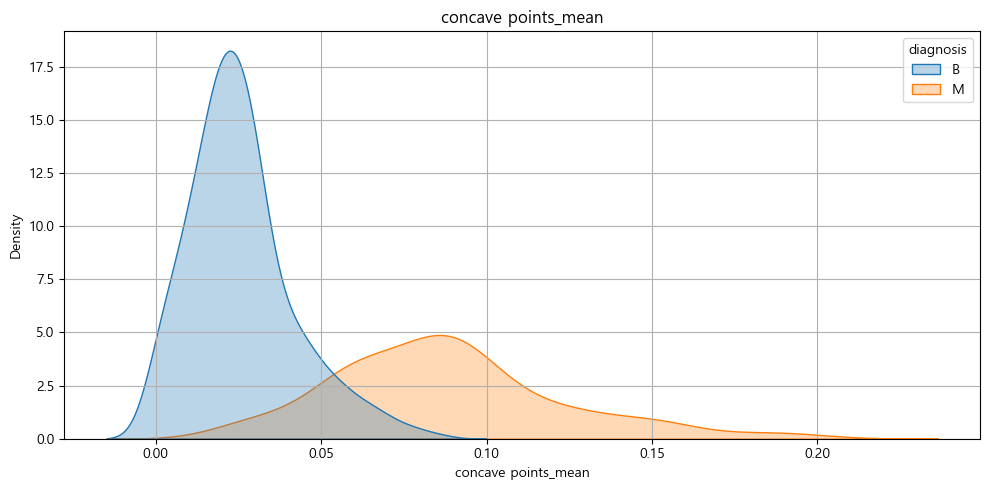

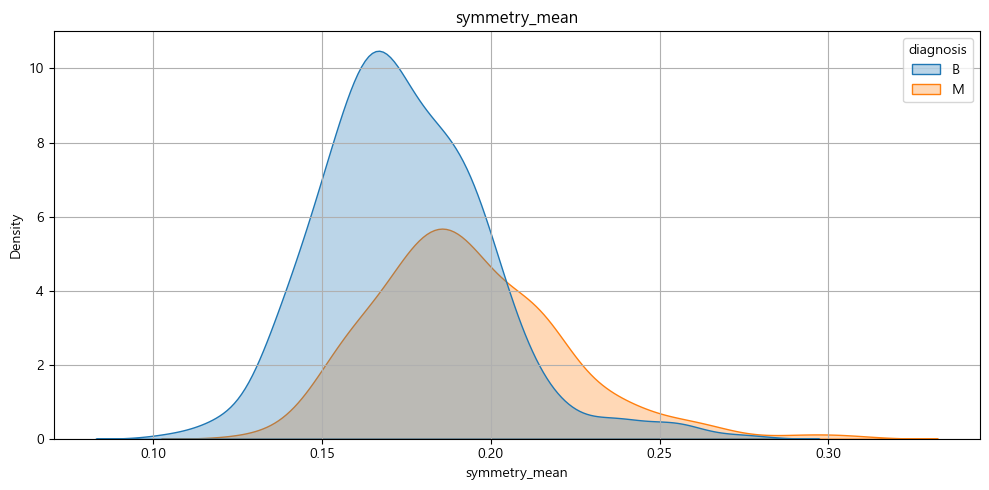

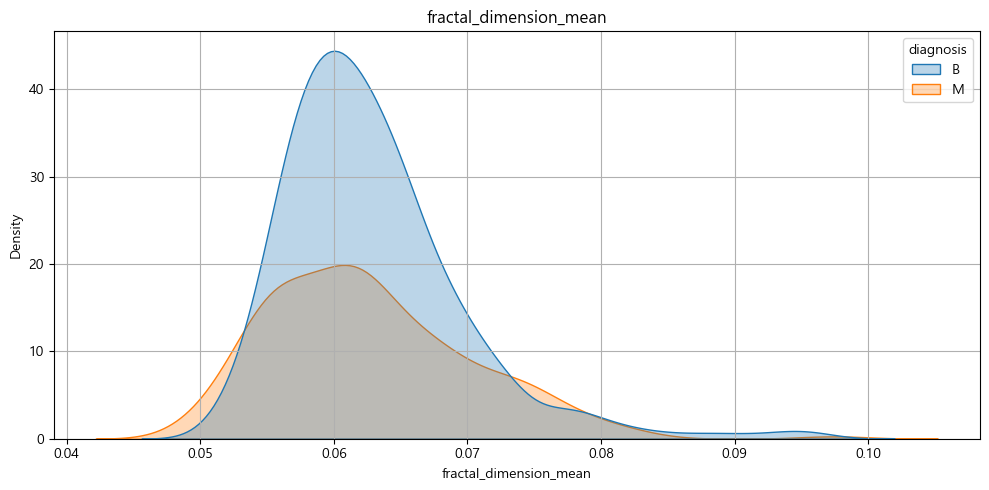

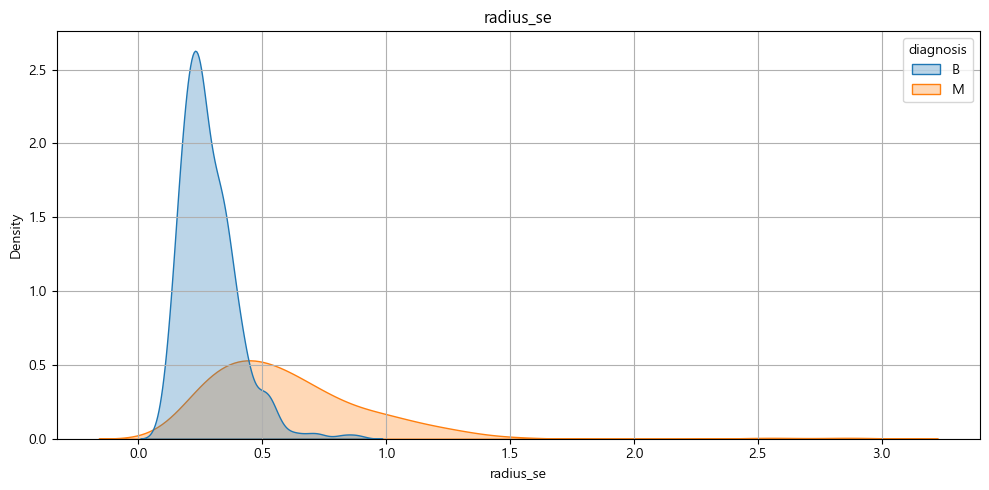

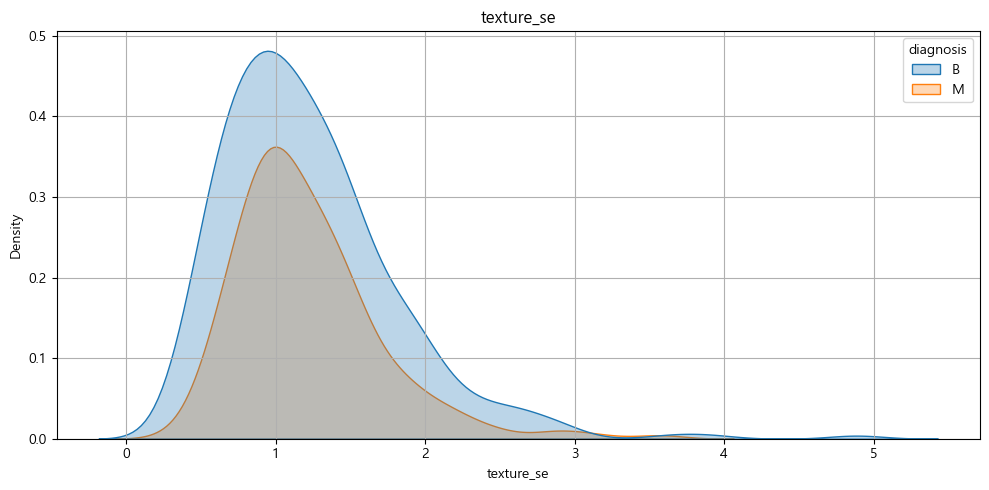

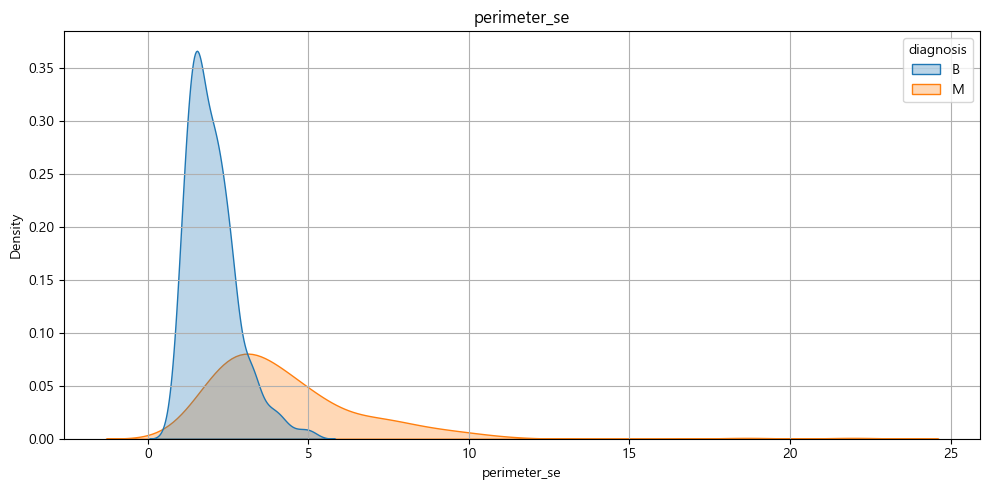

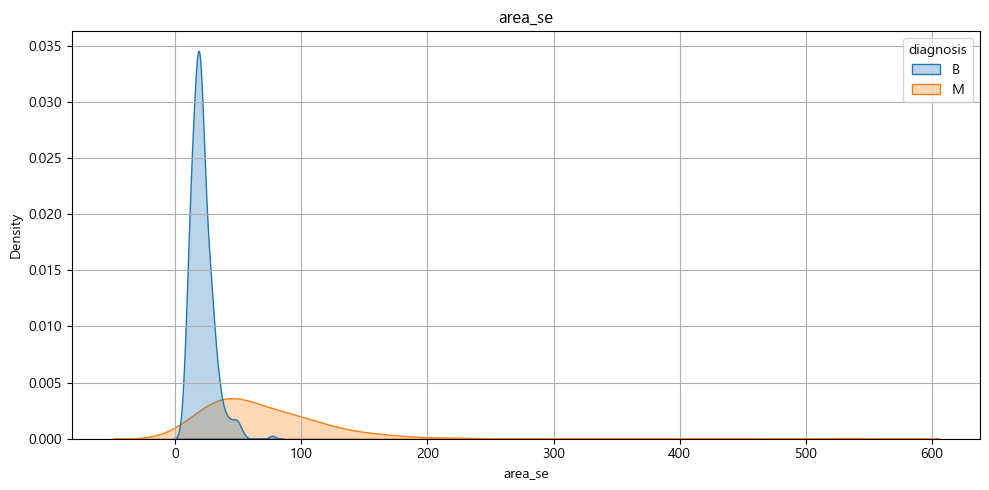

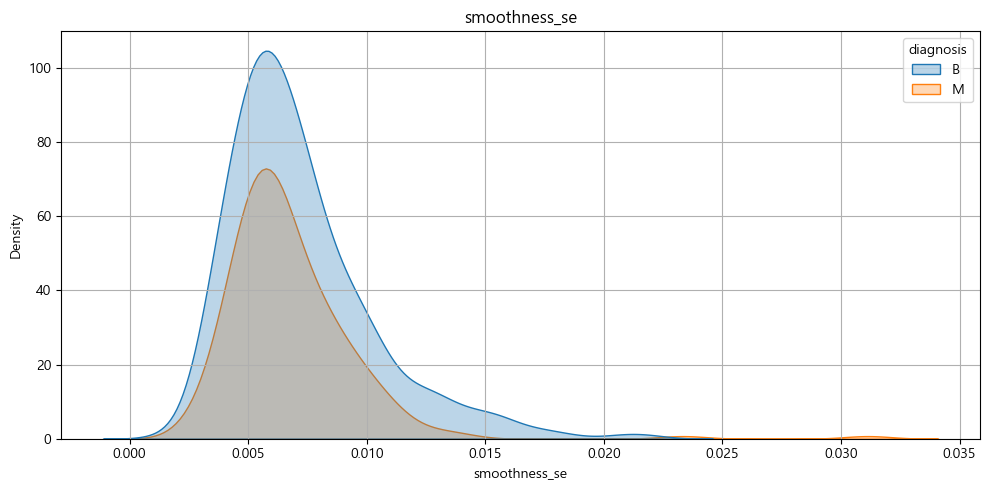

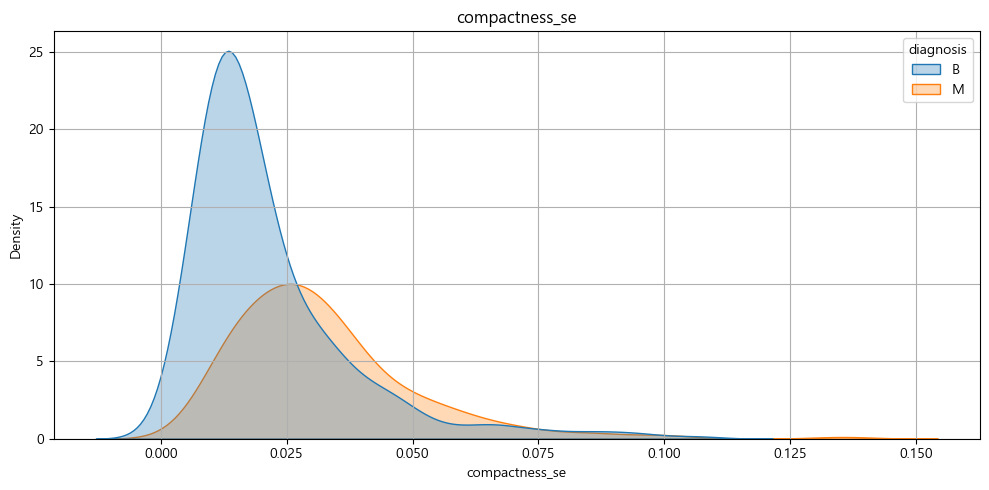

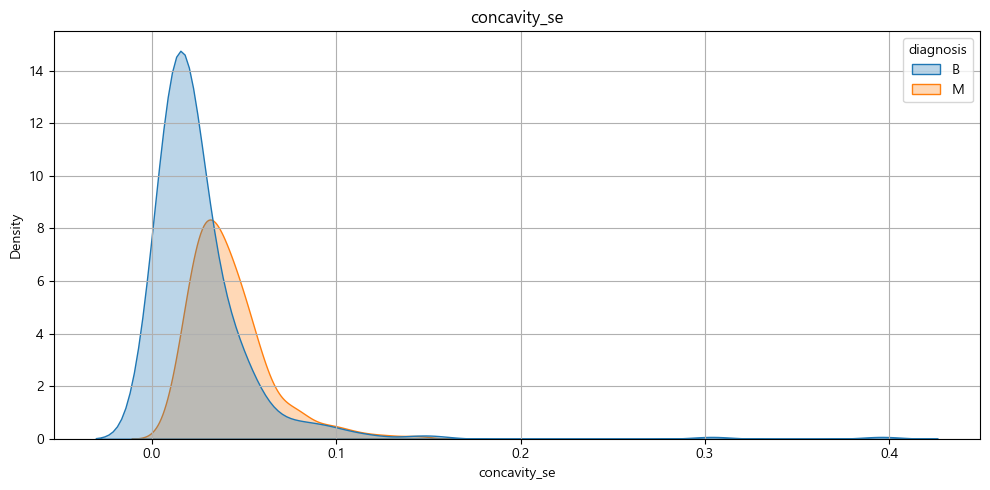

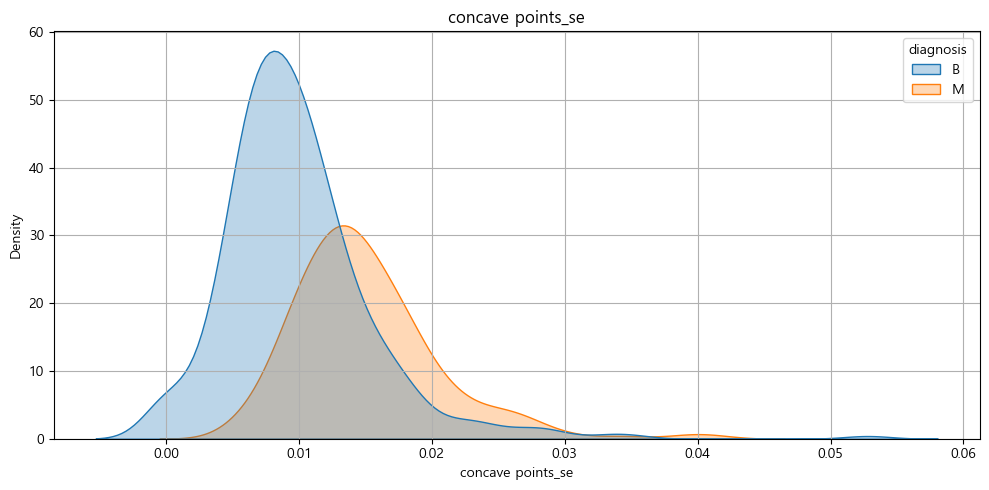

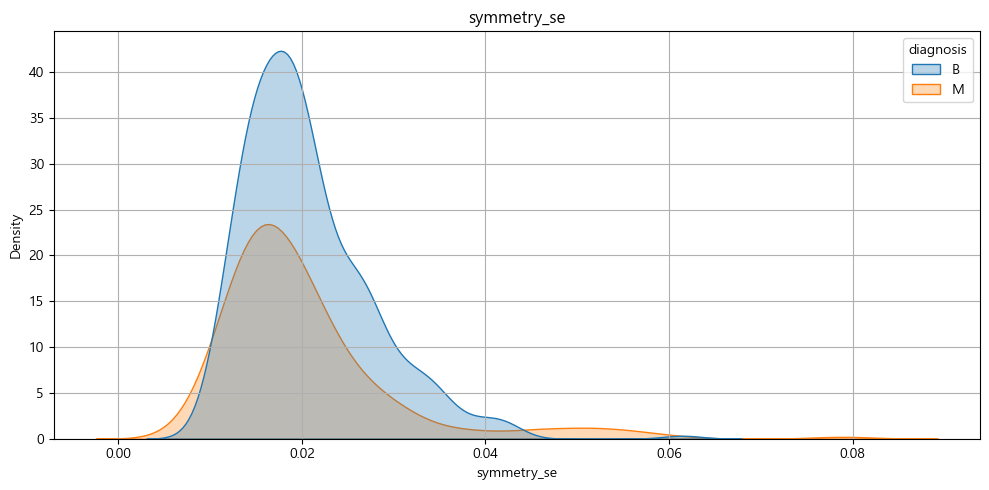

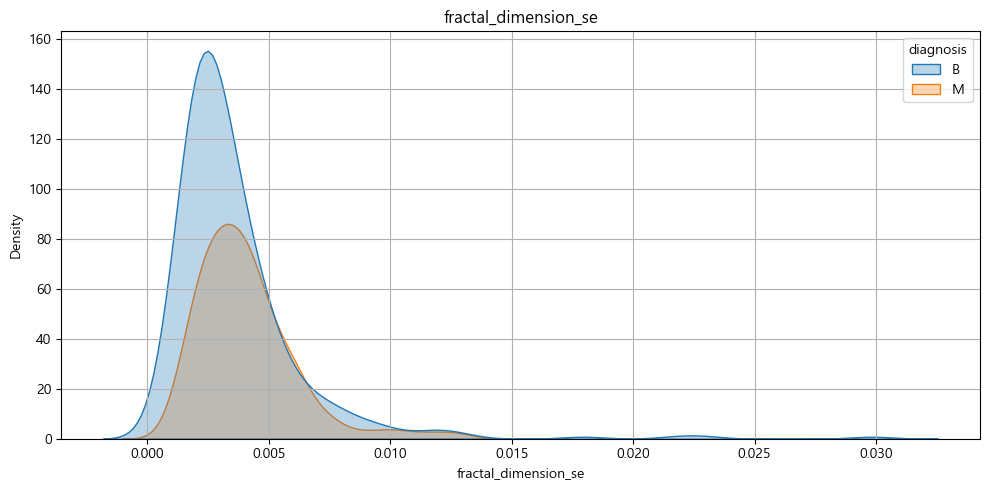

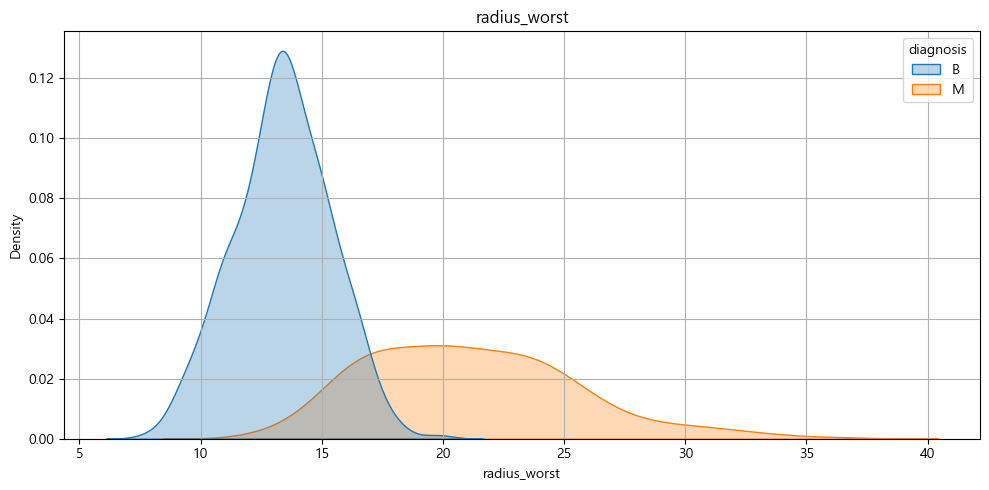

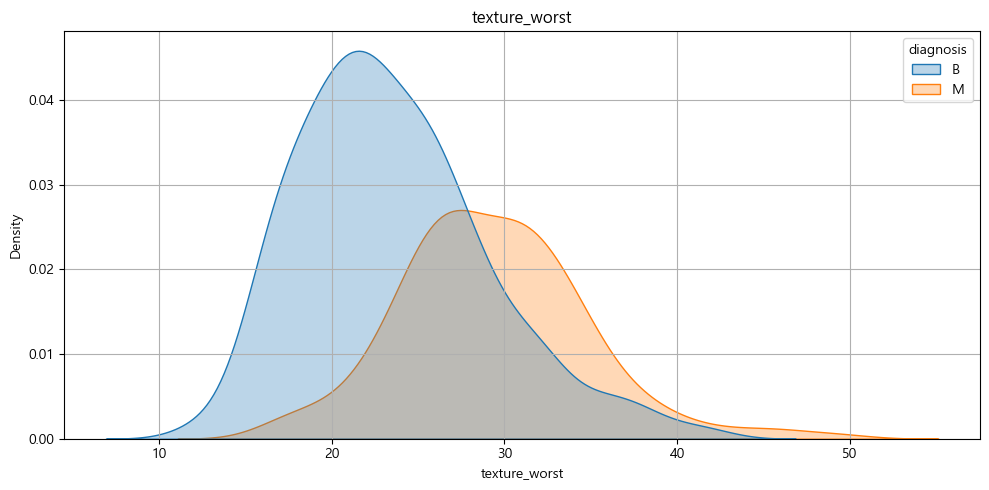

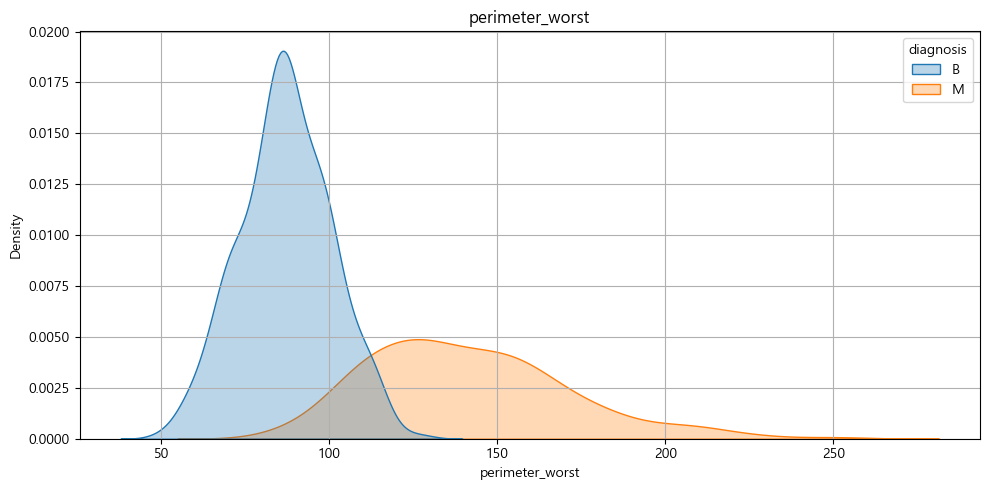

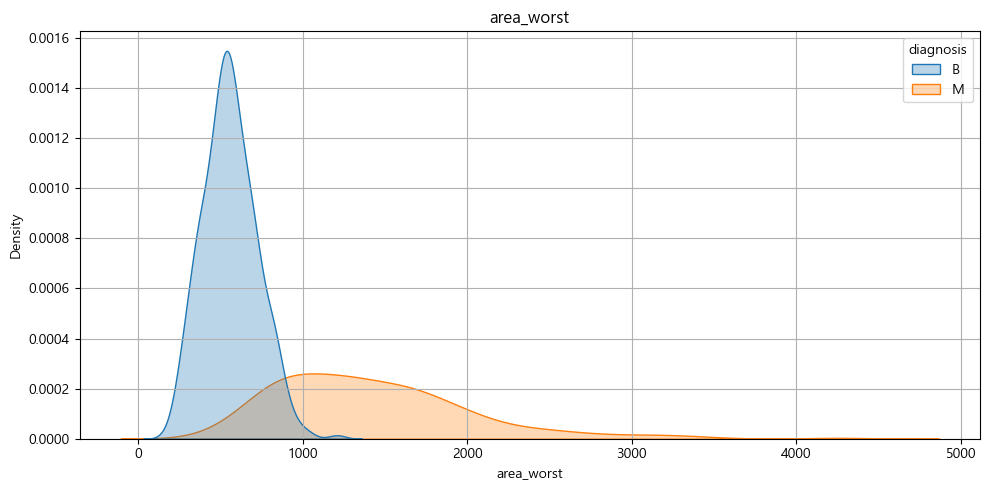

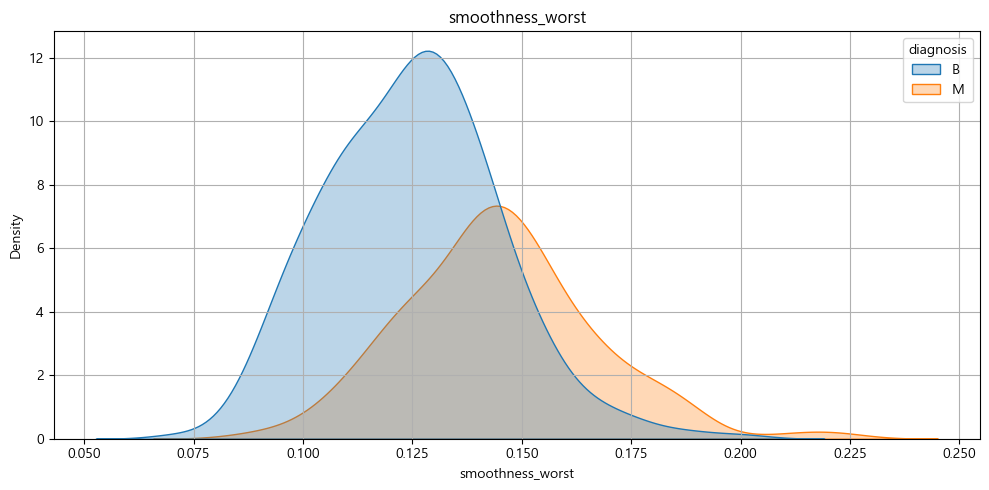

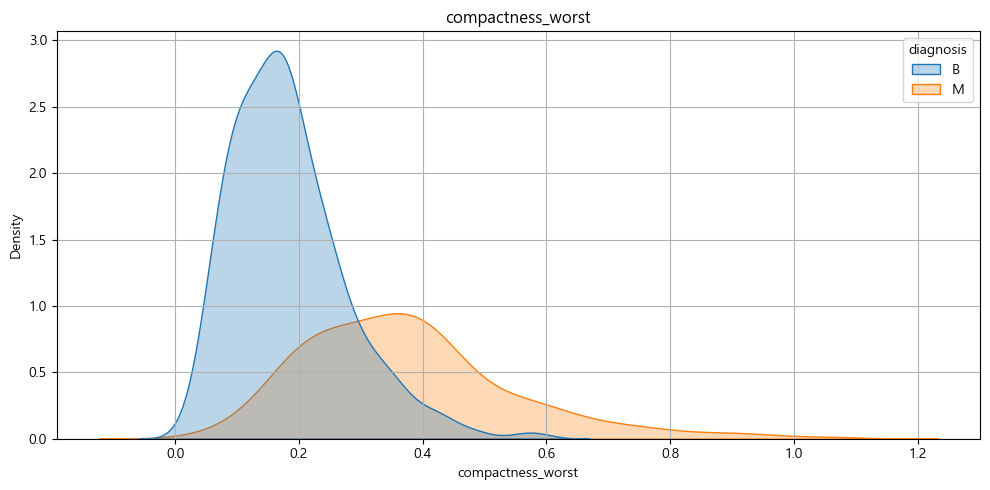

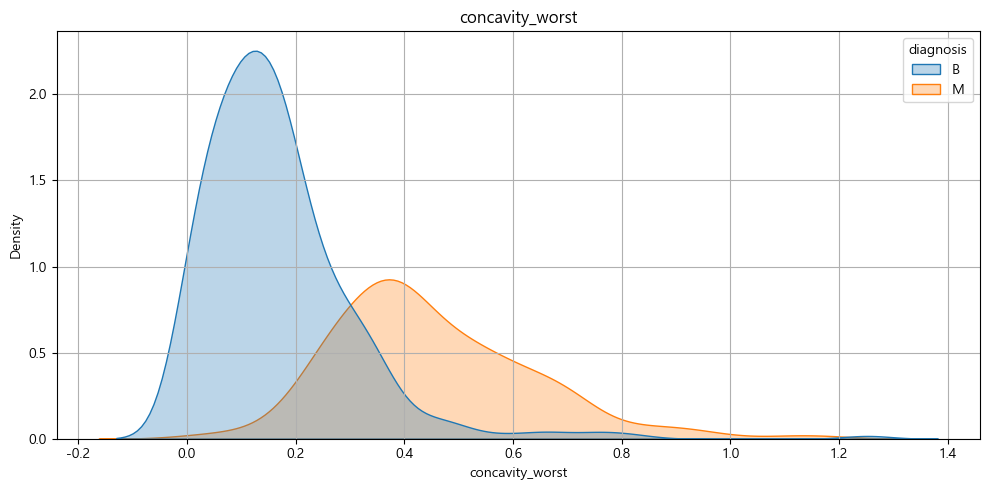

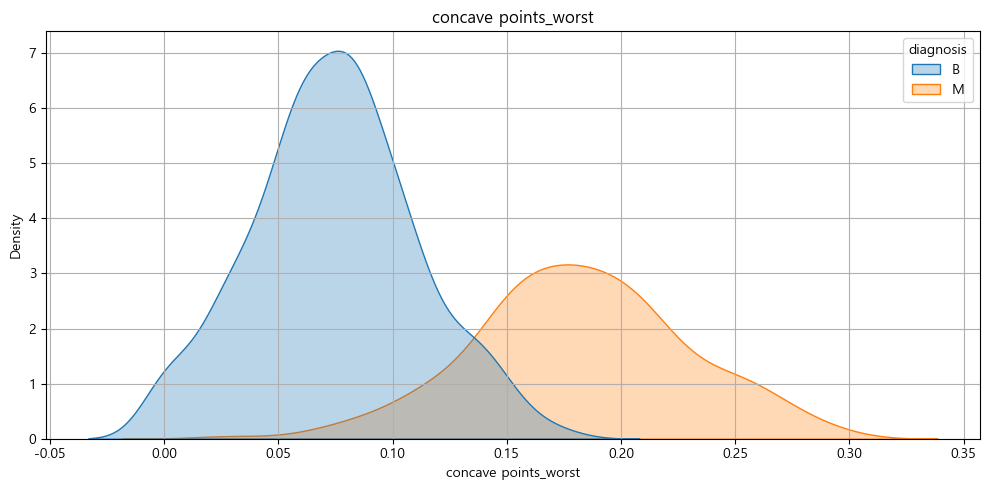

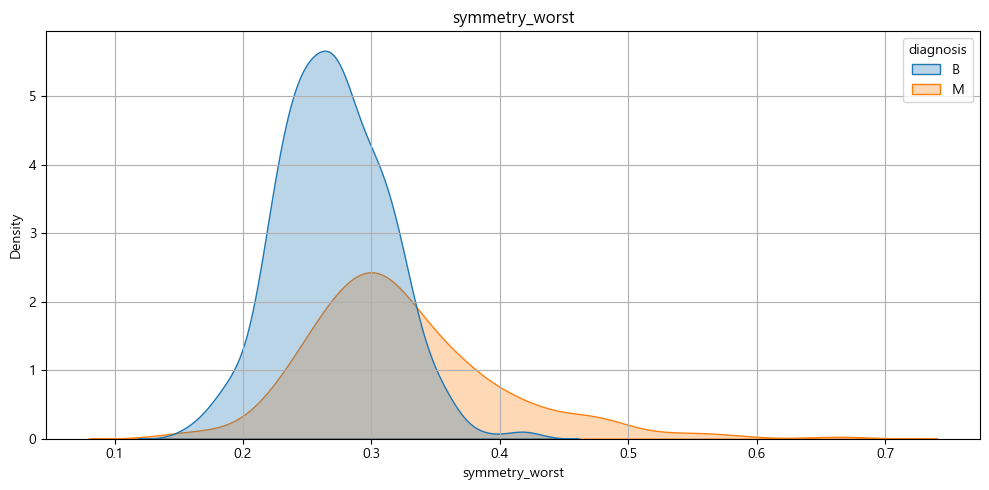

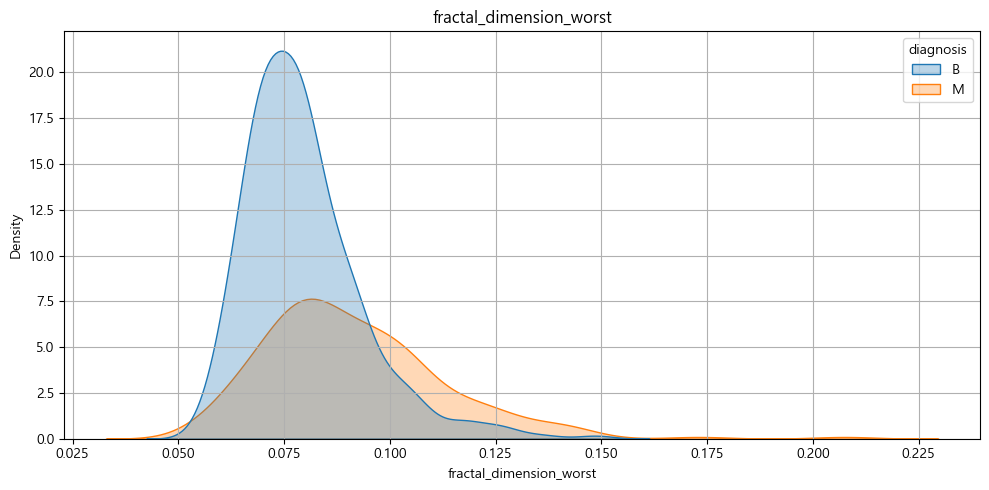

In [6]:
for x in xnames:
    if origin[x].dtype == 'category':
        my_stackplot(origin, xname=x, hue=yname, dpi=100, callback=lambda ax: ax.set_title(x))
    else:
        my_kdeplot(origin, xname=x, hue=yname, fill=True, dpi=100, callback=lambda ax: ax.set_title(x))

> 일부 변수에서 악성,양성에 따른 평균이 유의미한 차이가 없는 것으로 보이기는 하지만 일단 모든 변수를 다 투입하여 분석을 시도

## #03. 데이터 전처리

### [1] 스케일링

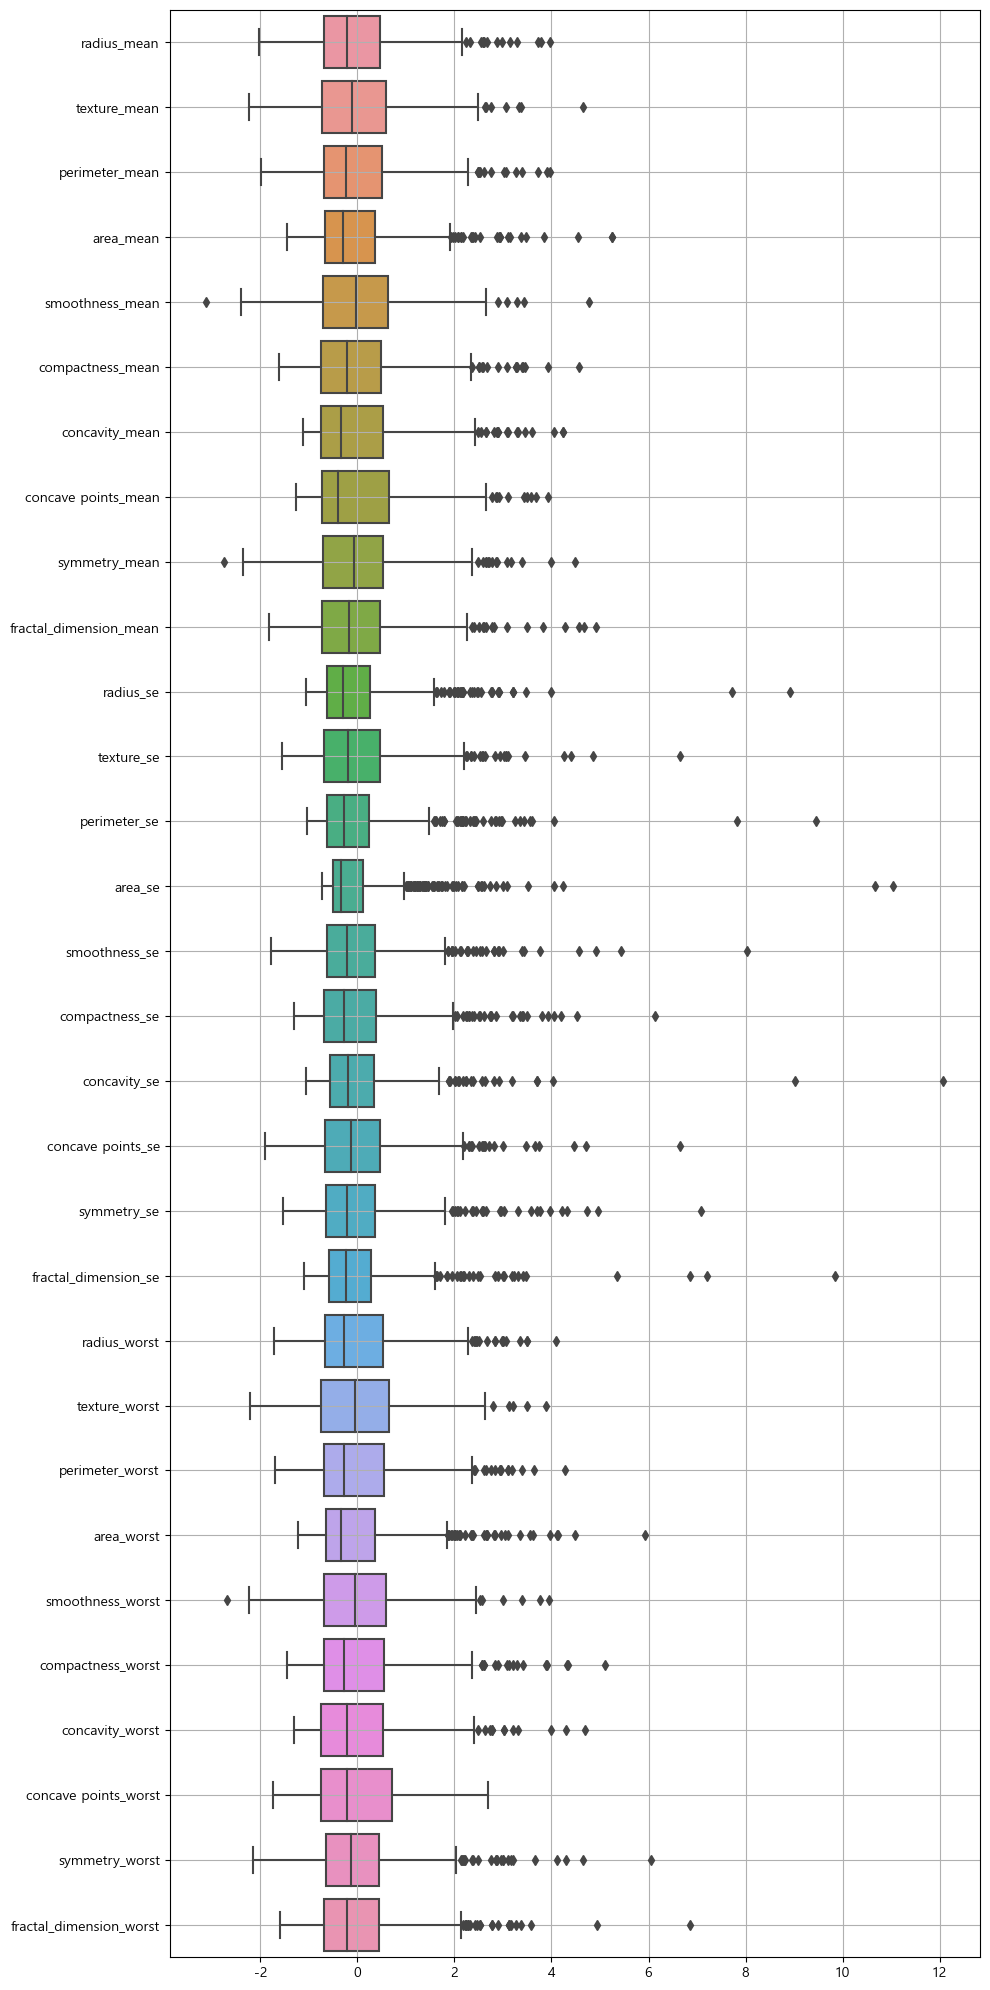

In [7]:
df = my_standard_scaler(origin, 'diagnosis')
my_boxplot(df, orient='h', figsize=(10, 20))



### [2] 종속변수 라벨링

`M`=악성=`1`, `B`=양성=`0`

In [8]:
df2 = my_labelling(df, 'diagnosis')
my_pretty_table(df2.head())

+----------+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+-------------+
|       id |   radius_mean |   texture_mean |   perimeter_mean |   area_mean |   smoothness_mean |   compactness_mean |   concavity_mean |   concave points_mean |   symmetry_mean |   fractal_dimension_mean |   radius_se |   texture_se |   perimeter_se |   area_se |   smoothness_se |   compactness_se |   concavity_se |   concave points_se |   symmetry_se |   fractal_dimension_se |   radius_worst 

## #03. 모든 데이터를 활용한 기본 분석 모형 구현

### [1] 데이터 분할

In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'diagnosis')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### [2] 로지스틱 회귀

[교차검증 TOP5]
+----+-----------+------------+------+-------------------+
|    | penalty   |   max_iter |    C |   mean_test_score |
|----+-----------+------------+------+-------------------|
|  7 | l2        |       1000 |  0.1 |          0.978022 |
| 10 | l2        |       1000 |    1 |          0.978022 |
| 13 | l2        |       1000 |   10 |          0.971429 |
| 16 | l2        |       1000 |  100 |          0.967033 |
|  4 | l2        |       1000 | 0.01 |          0.945055 |
+----+-----------+------------+------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.869719 |     0.859307 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy

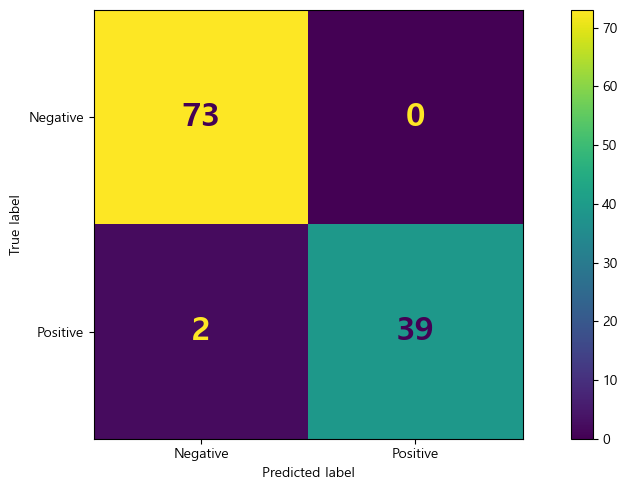

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


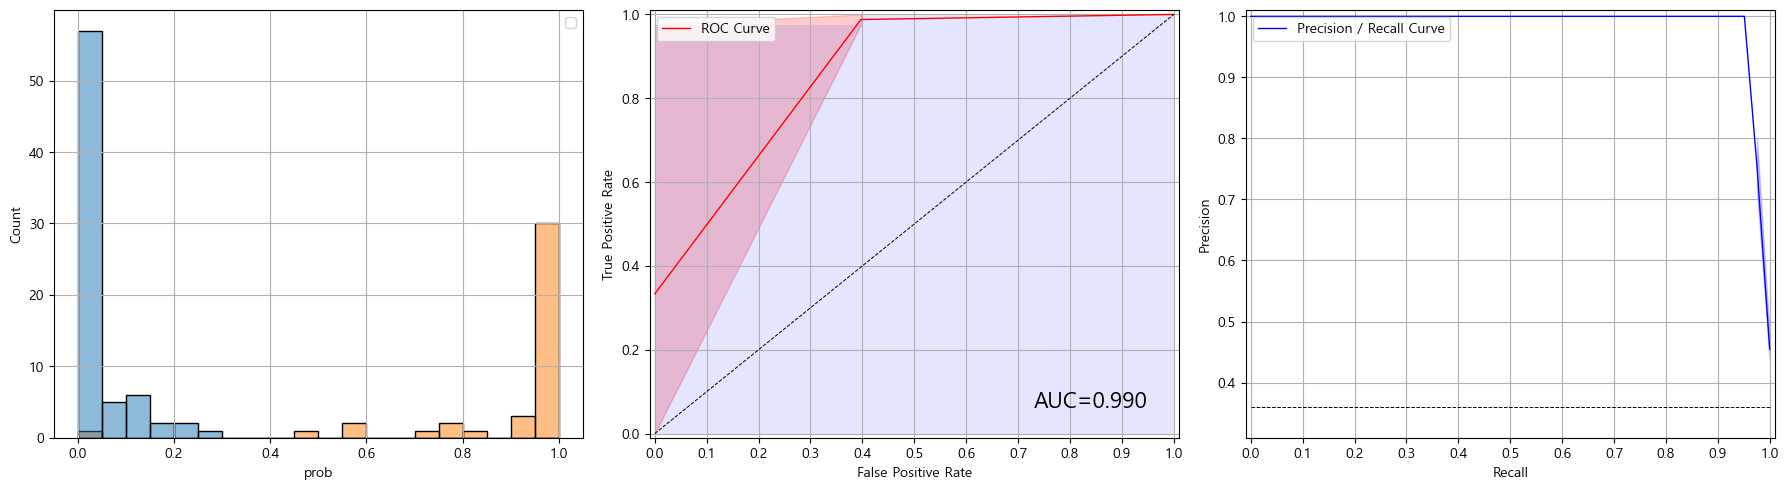


[학습곡선]


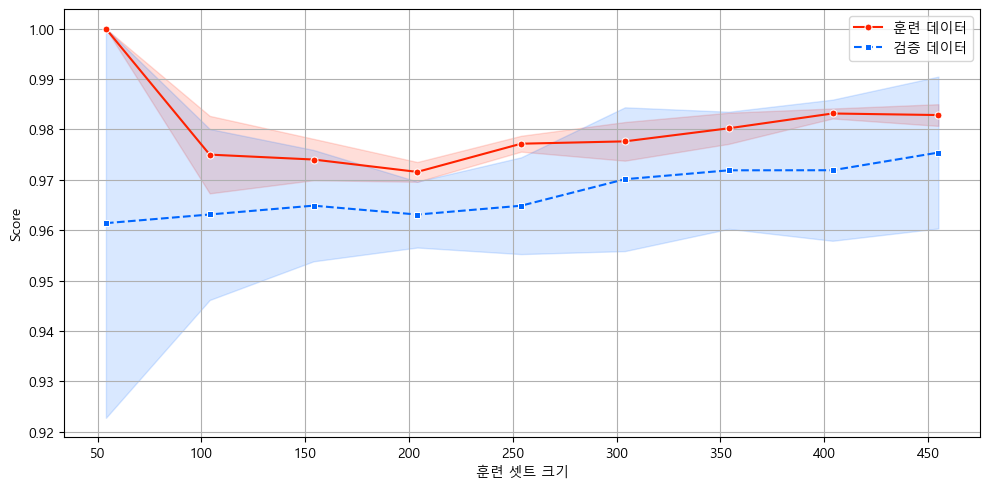

LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1)

In [10]:
my_logistic_classification(x_train, y_train, x_test, y_test)

### [3] KNN

[교차검증 TOP5]
+----+-----------+---------------+-----------+-------------------+
|    | weights   |   n_neighbors | metric    |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  6 | uniform   |             3 | manhattan |           0.96044 |
|  7 | distance  |             3 | manhattan |           0.96044 |
|  4 | uniform   |             7 | euclidean |          0.958242 |
|  0 | uniform   |             3 | euclidean |          0.956044 |
|  1 | distance  |             3 | euclidean |          0.956044 |
+----+-----------+---------------+-----------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |      0.98022 |     0.982456 |

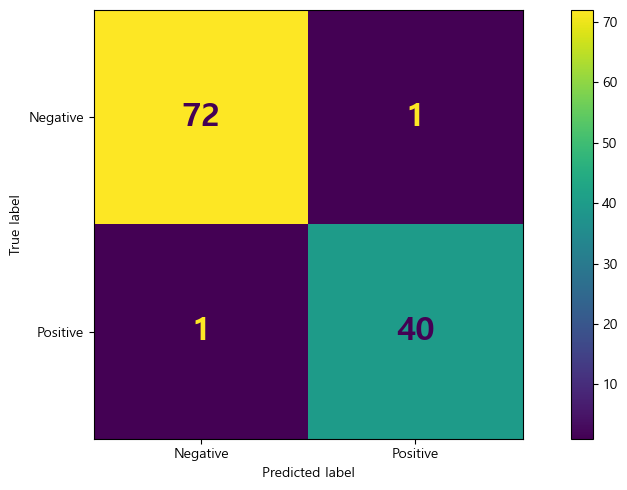

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


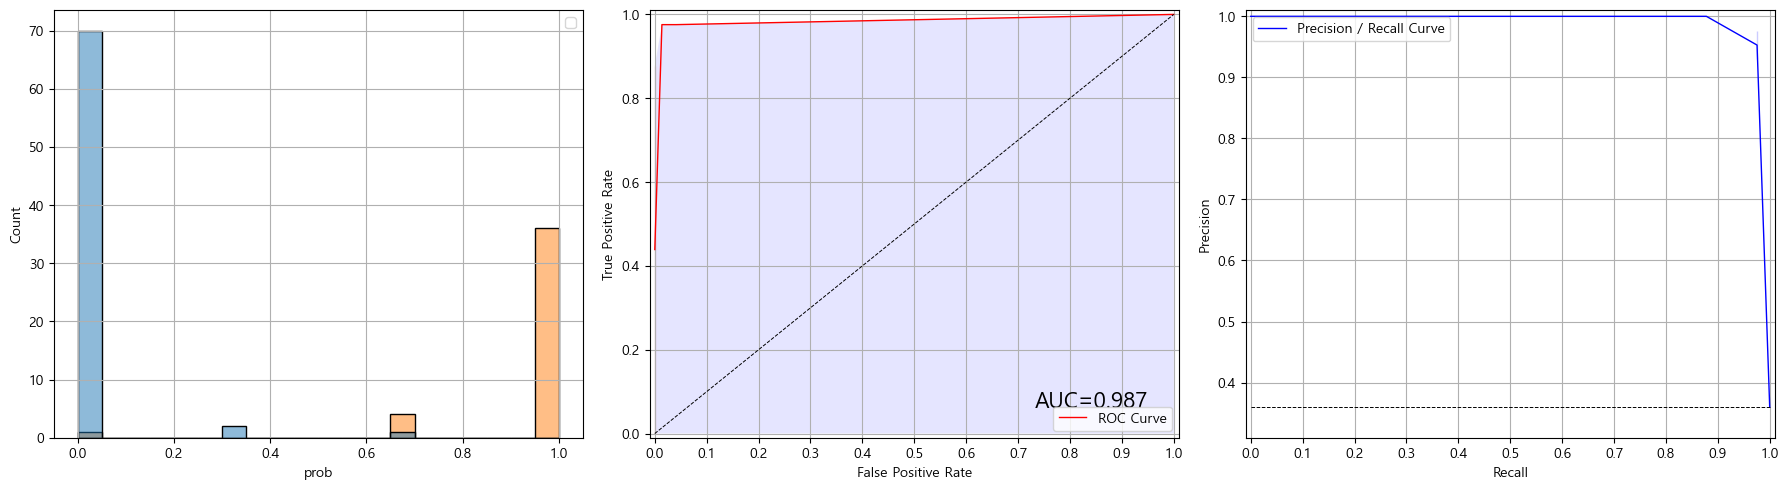


[학습곡선]


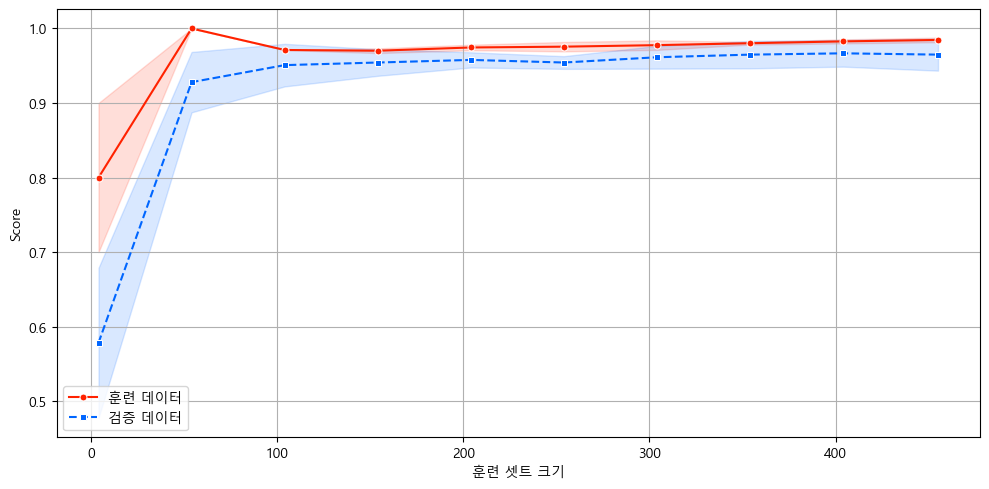

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)

In [11]:
my_knn_classification(x_train, y_train, x_test, y_test)

### [4] SVM

<class 'sklearn.svm._classes.SVC'>는n_jobs를 허용하지 않음


[교차검증 TOP5]
+----+----------+----------+-----+-------------------+
|    | kernel   |   degree |   C |   mean_test_score |
|----+----------+----------+-----+-------------------|
| 27 | rbf      |        3 |  10 |          0.969231 |
| 30 | rbf      |        4 |  10 |          0.969231 |
| 24 | rbf      |        2 |  10 |          0.969231 |
| 33 | rbf      |        5 |  10 |          0.969231 |
| 15 | rbf      |        3 |   1 |          0.964835 |
+----+----------+----------+-----+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.989011 |     0.982456 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |            1 |            1 | 양성으로 예측한 결과(TP

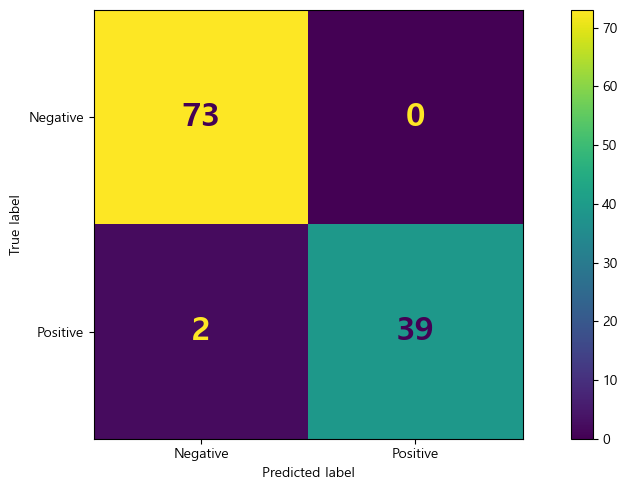


[학습곡선]


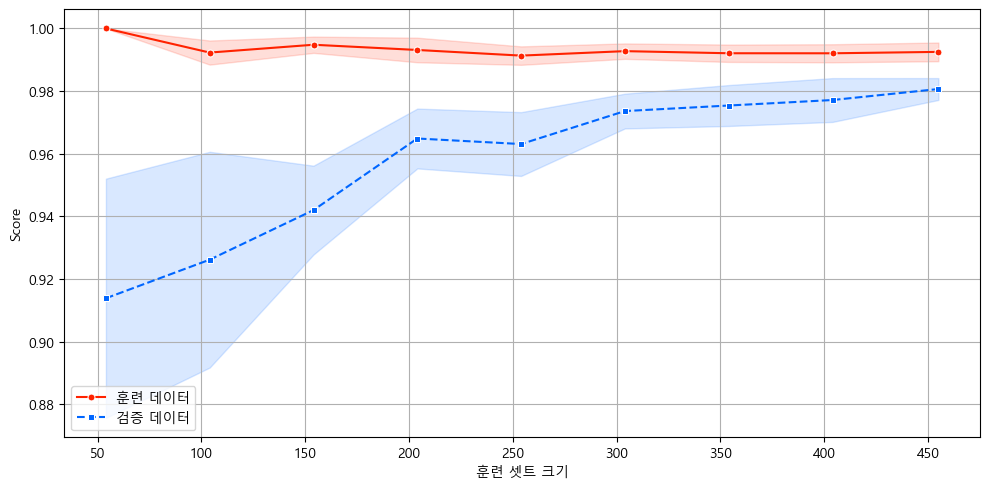

SVC(C=10, degree=2)

In [12]:
my_svc_classification(x_train, y_train, x_test, y_test)

### [5] 나이브베이즈

<class 'sklearn.naive_bayes.GaussianNB'>는n_jobs를 허용하지 않음
[교차검증 TOP5]
+----+-----------------+-------------------+
|    |   var_smoothing |   mean_test_score |
|----+-----------------+-------------------|
|  0 |           1e-09 |           0.92967 |
|  1 |           1e-08 |           0.92967 |
|  2 |           1e-07 |           0.92967 |
|  3 |           1e-06 |           0.92967 |
|  4 |           1e-05 |           0.92967 |
+----+-----------------+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.934066 |      0.95614 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.927273 |            1 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현

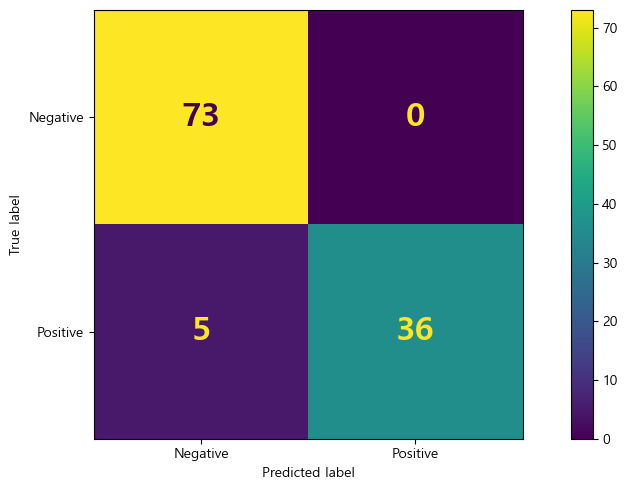

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


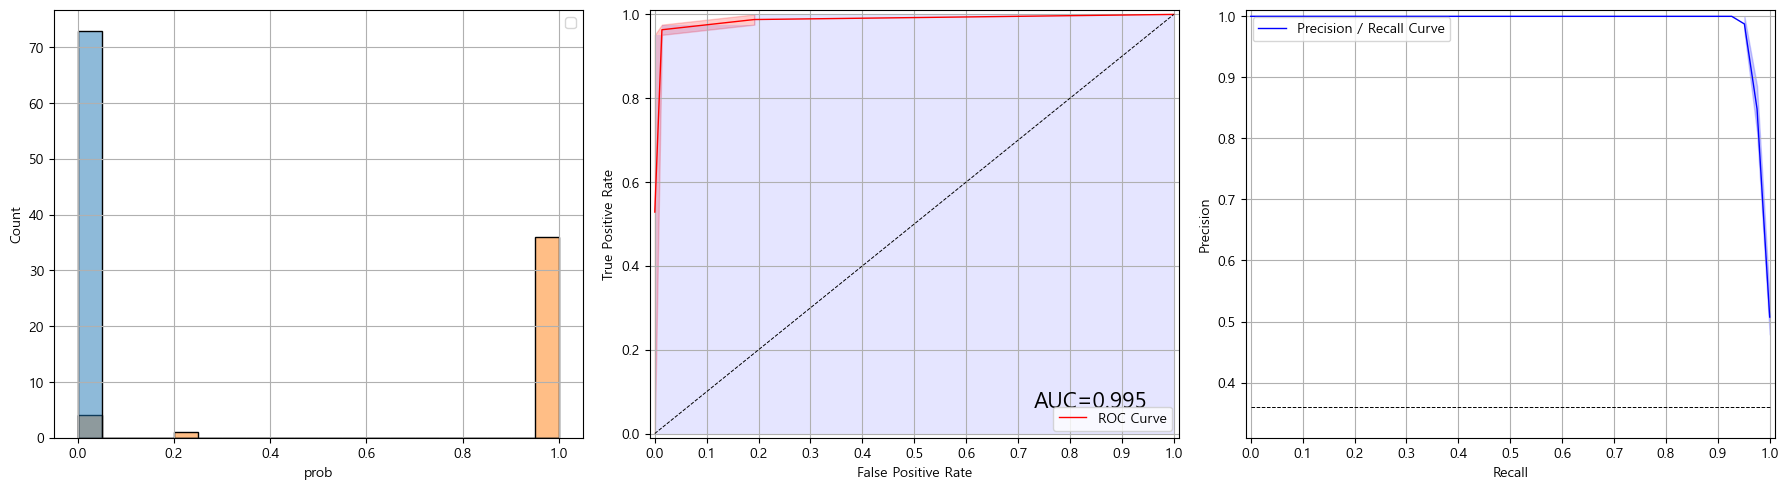


[학습곡선]


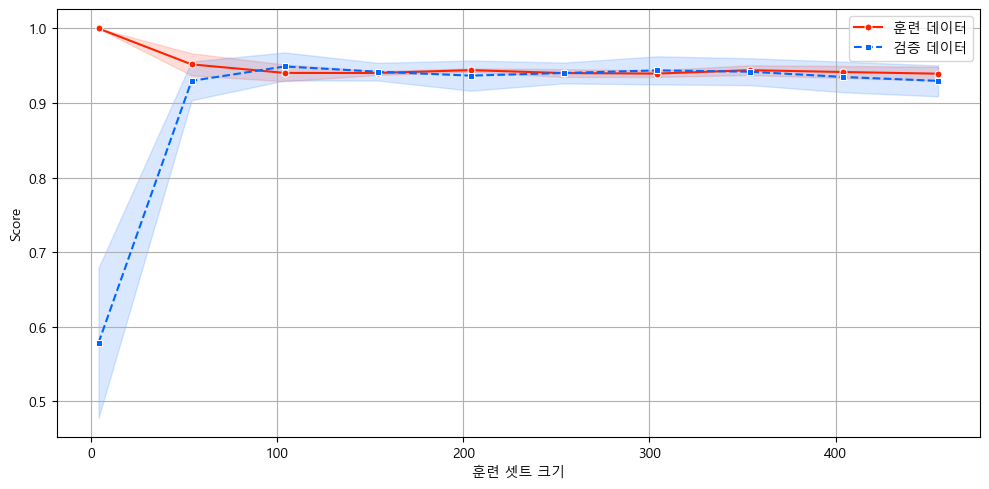

GaussianNB()

In [13]:
my_nb_classification(x_train, y_train, x_test, y_test)

### [6] 의사결정트리

<class 'sklearn.tree._classes.DecisionTreeClassifier'>는n_jobs를 허용하지 않음
[교차검증 TOP5]
+----+---------------------+--------------------+-------------+-------------+-------------------+
|    |   min_samples_split |   min_samples_leaf |   max_depth | criterion   |   mean_test_score |
|----+---------------------+--------------------+-------------+-------------+-------------------|
| 67 |                   3 |                  2 |           9 | entropy     |          0.945055 |
| 51 |                   2 |                  3 |           5 | entropy     |          0.945055 |
| 62 |                   4 |                  3 |           7 | entropy     |          0.945055 |
| 53 |                   4 |                  3 |           5 | entropy     |          0.940659 |
| 61 |                   3 |                  3 |           7 | entropy     |          0.940659 |
+----+---------------------+--------------------+-------------+-------------+-------------------+

[분류분석 성능평가]
+-------------------+-

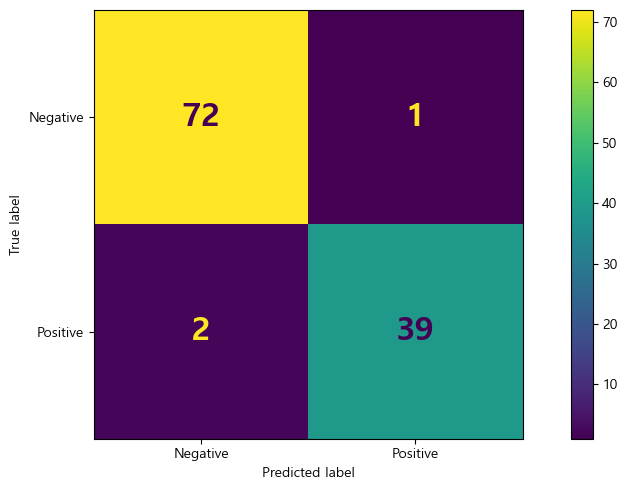

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


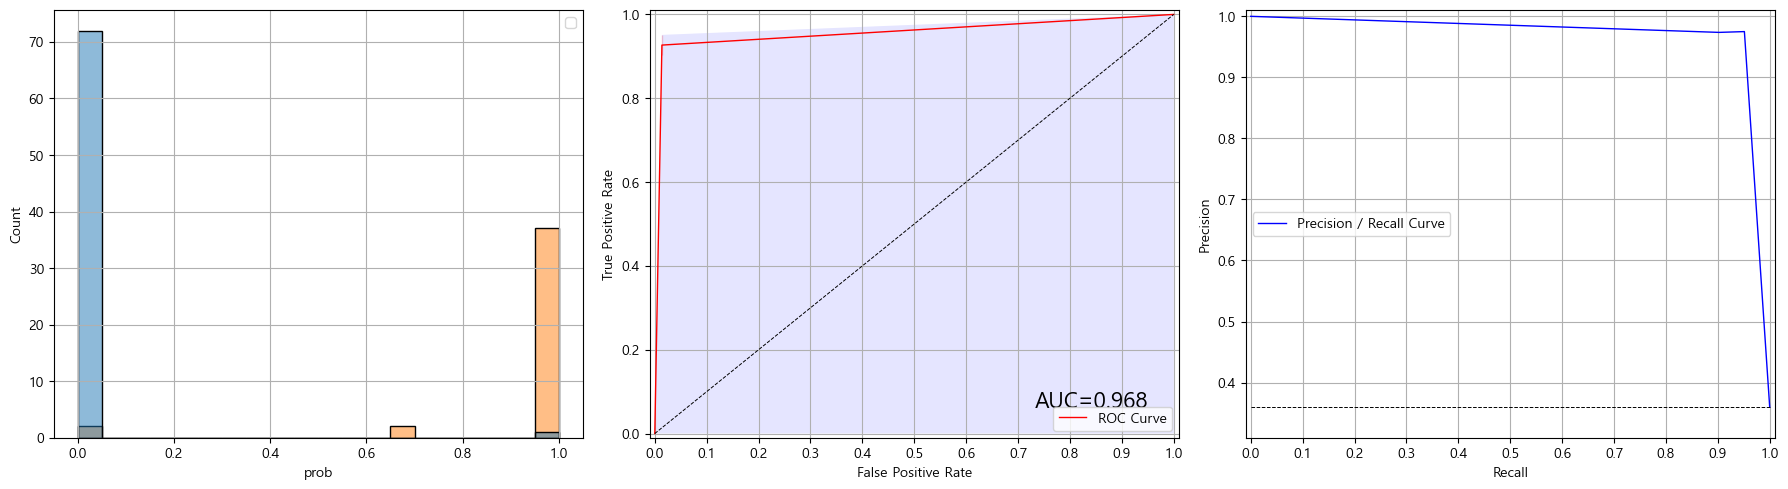


[학습곡선]


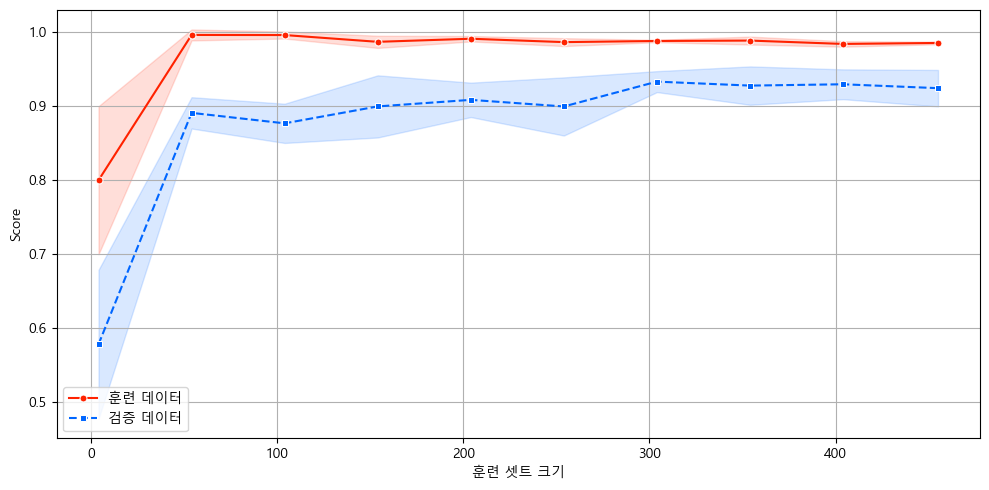

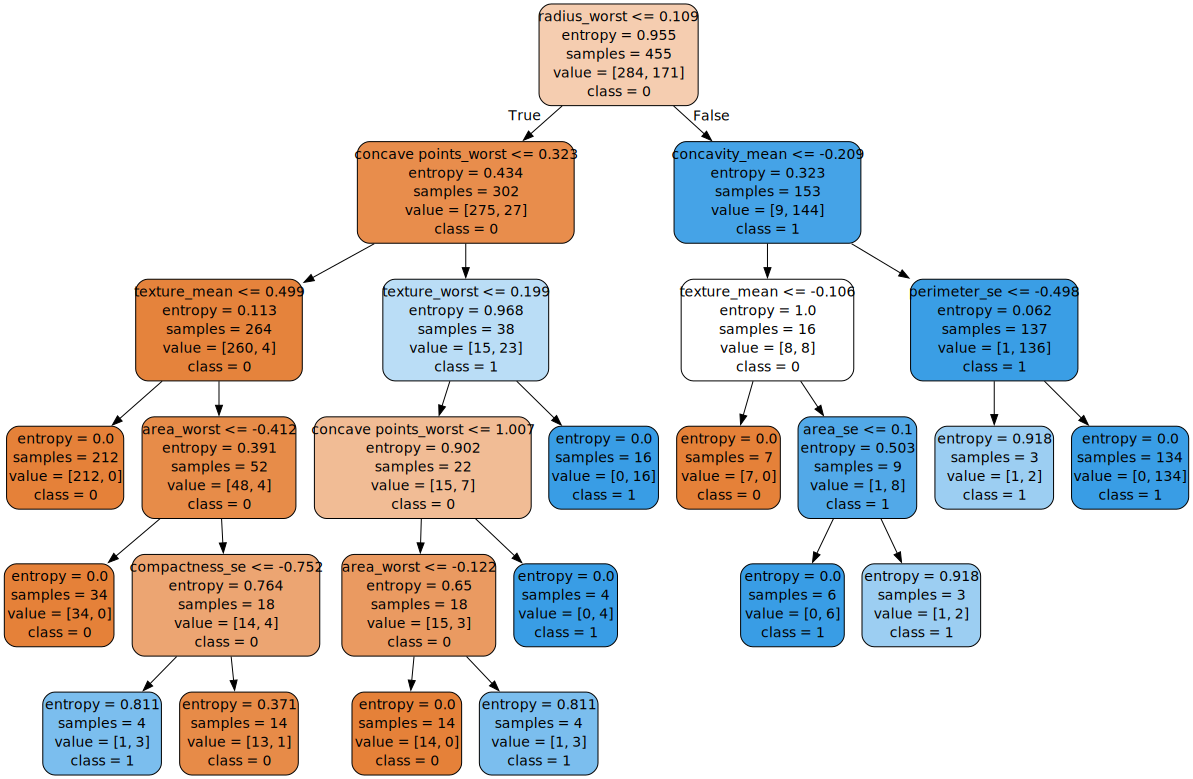

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [14]:
my_dtree_classification(x_train, y_train, x_test, y_test)